# Introduction/Overview

Maybe add something here

# Import data and libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns #for feature correlation
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.classifier import StackingClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
df = pd.read_csv('high_diamond_ranked_10min.csv') 

In [ ]:
df.head(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,0,0,15899,7.0,18161,225,42,698,101,22.5,1589.9,36,5,1,3,5,2,0,0,0,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,0,0,16874,6.8,16967,225,53,2411,1563,22.5,1687.4,57,1,0,6,7,9,0,0,0,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,0,0,15305,6.4,16138,209,48,-2615,-800,20.9,1530.5,15,0,1,13,5,11,1,1,0,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,0,0,16401,7.2,18527,189,61,-1979,-771,18.9,1640.1,15,2,1,7,7,5,2,1,1,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,0,0,15057,6.8,16805,220,39,-1548,-1574,22.0,1505.7,16,2,0,5,4,4,0,0,0,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


# Explore the Data

In [ ]:
df.shape

(9879, 40)

In [ ]:
# check for missing values
df.isnull().values.any()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [ ]:
#Shuffled dataset
df = df.sample(frac=1)
df.head(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
6432,4527243776,1,17,6,1,7,1,11,1,1,0,0,17709,7.2,19221,242,52,3324,1398,24.2,1770.9,29,4,0,1,7,0,1,0,1,0,14385,6.6,17823,227,68,-3324,-1398,22.7,1438.5
6408,4518035453,0,9,1,0,5,9,5,0,0,0,0,15942,6.8,17493,215,48,-1590,-1375,21.5,1594.2,40,3,1,9,5,13,1,1,0,0,17532,7.0,18868,221,70,1590,1375,22.1,1753.2
6402,4469530341,0,13,3,0,6,6,3,0,0,0,0,15933,7.2,18813,221,52,-866,259,22.1,1593.3,18,2,1,6,6,3,1,1,0,0,16799,7.2,18554,249,52,866,-259,24.9,1679.9
3095,4523640765,1,15,2,1,4,0,3,1,1,0,0,15282,6.8,17848,211,45,1629,677,21.1,1528.2,38,0,0,0,4,0,0,0,0,0,13653,6.8,17171,246,44,-1629,-677,24.6,1365.3
1035,4512800832,0,14,2,0,3,6,3,0,0,0,0,14901,6.8,16728,201,48,-1123,-976,20.1,1490.1,18,1,1,6,3,6,1,1,0,0,16024,6.8,17704,232,36,1123,976,23.2,1602.4
6449,4522209183,1,13,0,0,12,8,12,0,0,0,0,18968,7.0,18902,201,36,1686,886,20.1,1896.8,17,1,1,8,12,8,0,0,0,0,17282,7.0,18016,186,64,-1686,-886,18.6,1728.2
434,4519414547,1,19,0,0,13,4,11,1,1,0,0,20127,7.0,19575,234,48,6202,5368,23.4,2012.7,16,1,1,4,13,5,0,0,0,0,13925,6.0,14207,175,28,-6202,-5368,17.5,1392.5
1027,4477398725,1,16,3,1,9,8,12,0,0,0,0,17121,6.6,16462,212,36,217,434,21.2,1712.1,16,1,0,8,9,9,1,0,1,0,16904,6.4,16028,173,35,-217,-434,17.3,1690.4
1835,4502562701,1,16,2,1,8,7,6,2,1,1,0,17867,7.2,19316,226,76,764,2490,22.6,1786.7,16,3,0,7,8,6,0,0,0,0,17103,6.6,16826,178,59,-764,-2490,17.8,1710.3
4385,4521990616,1,21,2,1,9,6,7,0,0,0,0,18229,6.8,18093,230,46,2765,1407,23.0,1822.9,17,5,0,6,9,5,2,1,1,0,15464,6.6,16686,195,56,-2765,-1407,19.5,1546.4


In [ ]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


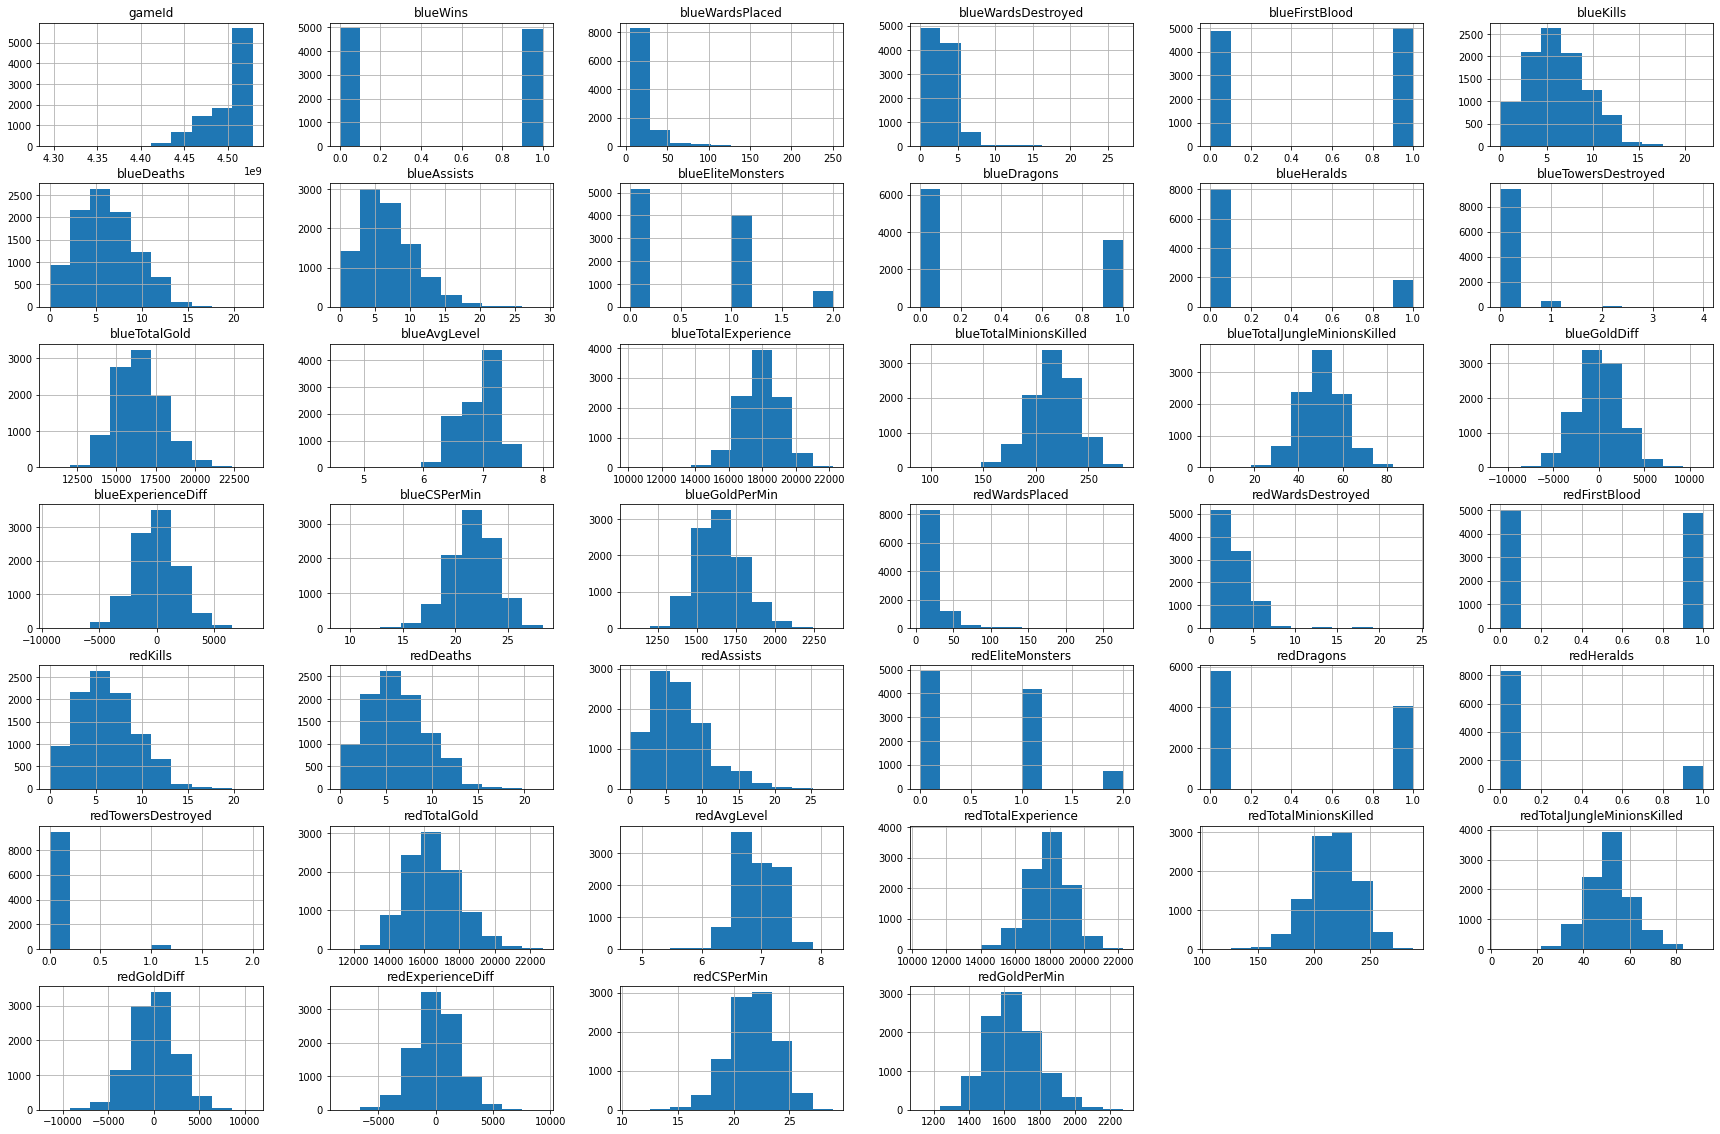

In [ ]:
df.hist(figsize=[30,20])
plt.show()

In [ ]:
# Check to see if the dataset is imbalanced, and if so by how much

class1 = len(df[df['blueWins']== 0])
class2 = len(df[df['blueWins']== 1])

print("Blue losses Occurances: " + str(class1))
print("Blue Wins Occurances: " + str(class2))

Blue losses Occurances: 4949
Blue Wins Occurances: 4930


Target variable blueWins is properly balanced almost split 50/50

Blue losses:  4949
Blue Winse:  4949


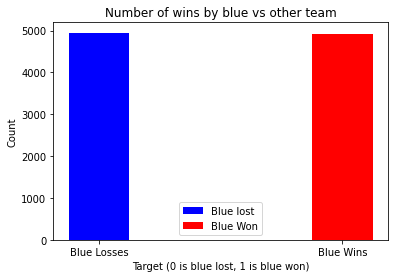

In [ ]:
# Looking at sampling distribution for the target variable to make sure data is balanced, can see slightly more people with heart disease
# but not large enough difference to be a cause for concern
%matplotlib inline

blue_lose = sum(df['blueWins'] == 0)
blue_win = sum(df['blueWins'] == 1)

plt.bar('Blue Losses', blue_lose, color = 'b', width = 0.25, label='Blue lost')
plt.bar('Blue Wins', blue_win, color = 'r', width = 0.25, label='Blue Won')

print("Blue losses: ",blue_lose)
print("Blue Winse: ", blue_lose)

plt.title("Number of wins by blue vs other team")
plt.xlabel("Target (0 is blue lost, 1 is blue won)")
plt.ylabel("Count")
plt.legend()

Lets analyze some features in the dataset against our target variable

Number of enemies killed by blue team total where blue lost:25587
Number of enemies killed by blue team total where blue won:35504


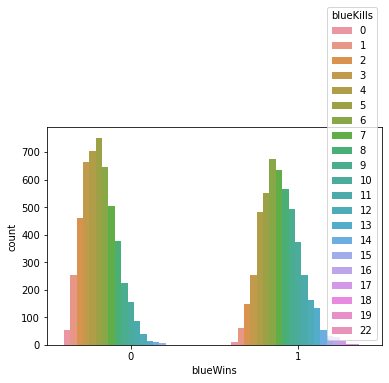

In [ ]:
sns.countplot(x='blueWins',hue='blueKills',data=df)
print("Number of enemies killed by blue team total where blue lost:" + str(df.loc[df['blueWins'] == 0]['blueKills'].sum()))
print("Number of enemies killed by blue team total where blue won:" + str(df.loc[df['blueWins'] == 1]['blueKills'].sum()))

We see that when blue lost in total there was 25587 kills by blue whereas when they won they got 35504 kills total. (considering all kills within the dataset). This gives us an inital indication that if blue wins we would expect more kills by the team. 

Number of enemies killed by blue team total where blue lost:35292
Number of enemies killed by blue team total where blue won:25342


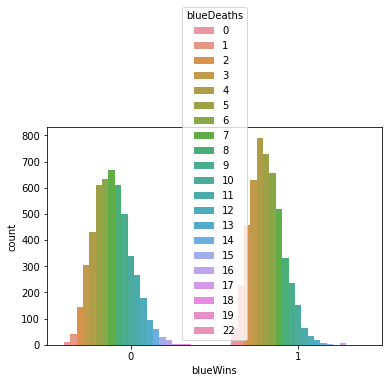

In [ ]:
sns.countplot(x='blueWins',hue='blueDeaths',data=df)
print("Number of enemies killed by blue team total where blue lost:" + str(df.loc[df['blueWins'] == 0]['blueDeaths'].sum()))
print("Number of enemies killed by blue team total where blue won:" + str(df.loc[df['blueWins'] == 1]['blueDeaths'].sum()))

Inversly as found above we see here that if blue wins we would exepct less deaths by blue team.

In [ ]:
df.corr()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,1.000000,0.000985,0.005361,-0.012057,-0.011577,-0.038993,-0.013160,-0.023329,0.016599,0.008962,0.015551,-0.007467,-0.033754,-0.040956,-0.040852,-0.002917,-0.004193,-0.014670,-0.012315,-0.002917,-0.033754,0.007405,-0.001197,0.011577,-0.013160,-0.038993,-0.008664,0.017296,0.017416,0.006163,0.003557,-0.010622,-0.012419,-0.021187,-0.005118,0.006040,0.014670,0.012315,-0.005118,-0.010622
blueWins,0.000985,1.000000,0.000087,0.044247,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,0.092385,0.115566,0.417213,0.357820,0.396141,0.224909,0.131445,0.511119,0.489558,0.224909,0.417213,-0.023671,-0.055400,-0.201769,-0.339297,0.337358,-0.271047,-0.221551,-0.209516,-0.097172,-0.103696,-0.411396,-0.352127,-0.387588,-0.212171,-0.110994,-0.511119,-0.489558,-0.212171,-0.411396
blueWardsPlaced,0.005361,0.000087,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,0.010104,0.009462,0.019725,0.034349,0.031719,-0.033925,0.010501,0.015800,0.027943,-0.033925,0.019725,-0.012906,0.115549,-0.003228,-0.002612,0.018138,-0.009009,-0.022817,-0.020121,-0.011964,-0.008225,-0.005685,-0.008882,-0.013000,-0.012395,0.001224,-0.015800,-0.027943,-0.012395,-0.005685
blueWardsDestroyed,-0.012057,0.044247,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,0.016940,-0.009150,0.060054,0.060294,0.067462,0.111028,-0.023452,0.078585,0.077946,0.111028,0.060054,0.135966,0.123919,-0.017717,-0.073182,0.033748,-0.046212,-0.034509,-0.034439,-0.012712,-0.023943,-0.067467,-0.059090,-0.057314,0.040023,-0.035732,-0.078585,-0.077946,0.040023,-0.067467
blueFirstBlood,-0.011577,0.201769,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,0.077509,0.083316,0.312058,0.177617,0.190365,0.125642,0.018190,0.378511,0.240665,0.125642,0.312058,-0.019142,-0.043304,-1.000000,-0.247929,0.269425,-0.201140,-0.141627,-0.135327,-0.060246,-0.069584,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.378511,-0.240665,-0.156711,-0.301479
blueKills,-0.038993,0.337358,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,0.076195,0.180314,0.888751,0.434867,0.472155,-0.030880,-0.112506,0.654148,0.583730,-0.030880,0.888751,-0.034239,-0.092278,-0.269425,0.004044,1.000000,-0.020344,-0.224564,-0.207949,-0.104423,-0.082491,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.654148,-0.583730,-0.472203,-0.161127
blueDeaths,-0.013160,-0.339297,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,-0.095527,-0.071441,-0.162572,-0.414755,-0.460122,-0.468560,-0.228102,-0.640000,-0.577613,-0.468560,-0.162572,0.008102,0.038672,0.247929,1.000000,0.004044,0.804023,0.163340,0.150746,0.076639,0.156780,0.885728,0.433383,0.464584,-0.040521,-0.100271,0.640000,0.577613,-0.040521,0.885728
blueAssists,-0.023329,0.276685,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,0.028434,0.123663,0.748352,0.292661,0.303022,-0.062035,-0.134023,0.549761,0.437002,-0.062035,0.748352,-0.032474,-0.064501,-0.229485,-0.026372,0.813667,-0.007481,-0.182985,-0.189563,-0.058074,-0.060880,-0.133948,-0.356928,-0.396652,-0.337515,-0.160915,-0.549761,-0.437002,-0.337515,-0.133948
blueEliteMonsters,0.016599,0.221944,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,0.640271,0.166644,0.239396,0.203530,0.232774,0.118762,0.198378,0.281464,0.263991,0.118762,0.239396,-0.017292,-0.005288,-0.151603,-0.204764,

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: vmin, vmax. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


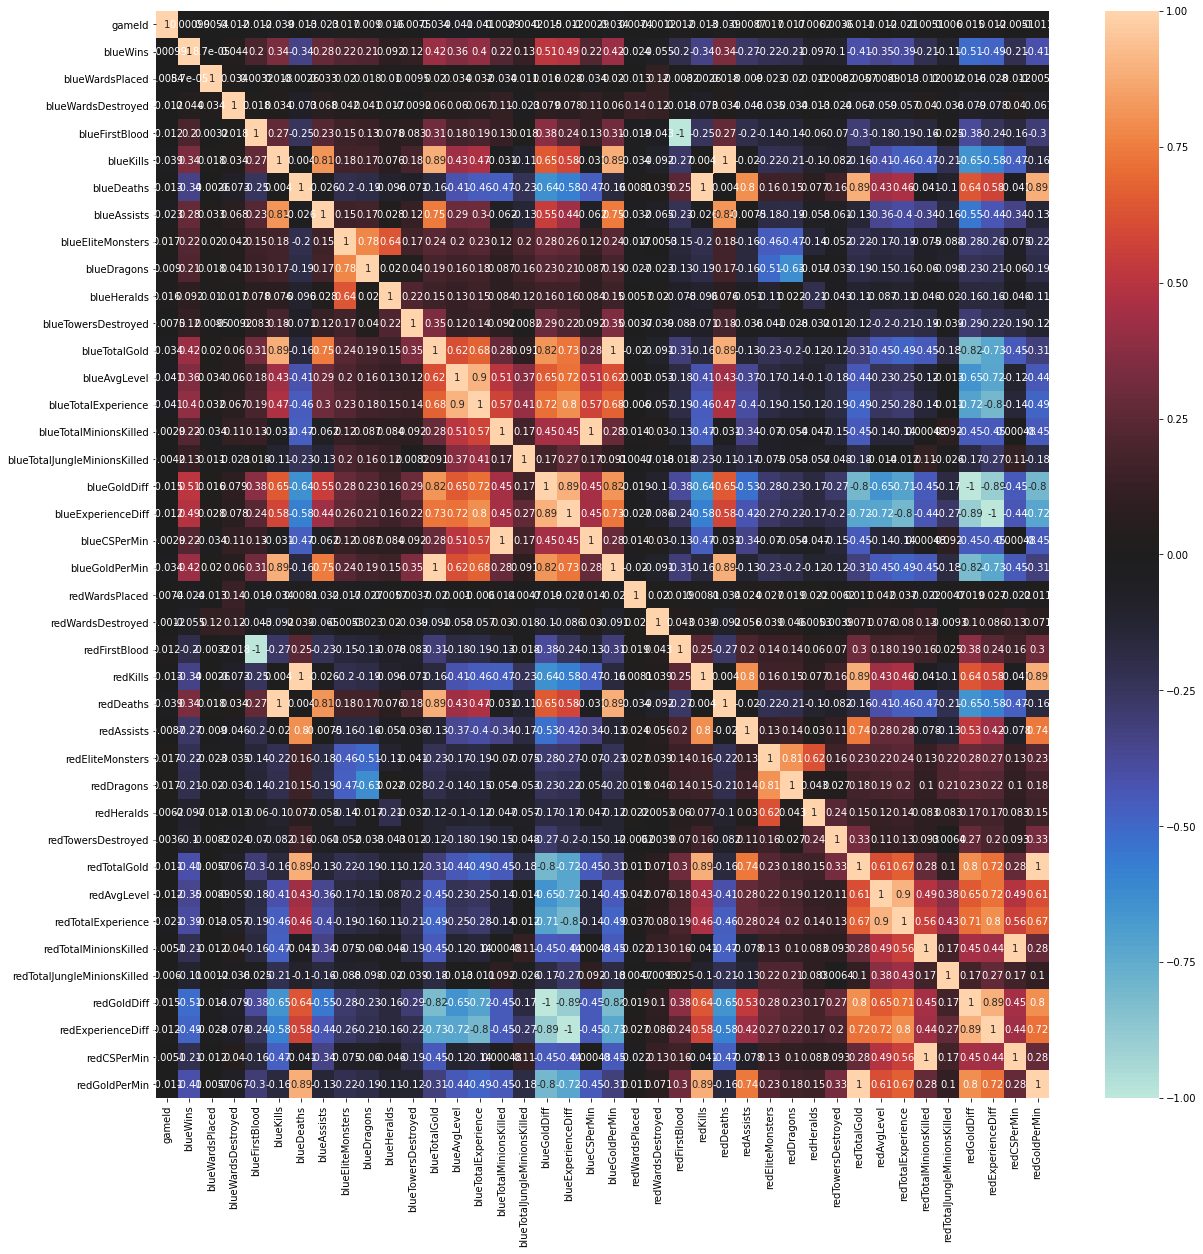

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
corrmat = df.corr()
sns.heatmap(corrmat,-1,1,ax=ax,center=0,annot=True);

High positive coorelation between elite monsters and dragons meaning that if you have control over dragon objective, you'll have control over the elite monster objectives

High positive coorelation between kills and gold per minute

High positive coorelation between total gold and gold per minute, gold diff, kill, assists, and total experience

This high positive coorelation is relatively the same between both red and blue team suggesting if one team gets the advantage in one of these high coorelated fields, they are more likely to win and stronger in the game at that instant.

SPLIT UP BETWEEN RED AND BLUE TEAM

In [ ]:
blue_f = []
red_f = []

for i in list(df):
  if ("red" in i):
    red_f.append(i)
  elif ("blue" in i):
    blue_f.append(i)

blue_df = df[blue_f]
red_df = df[red_f]

RED TEAM CORR MAP

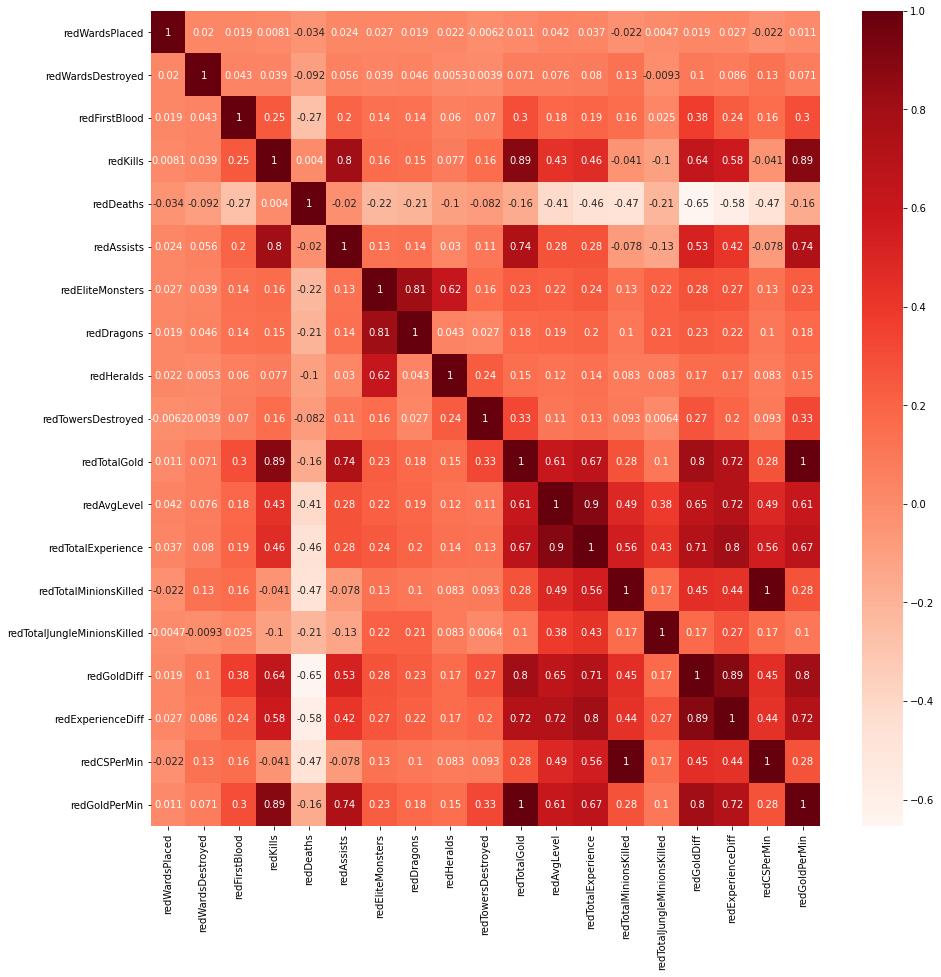

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(red_df.corr(), annot=True, cmap='Reds')

BLUE TEAM CORR MAP

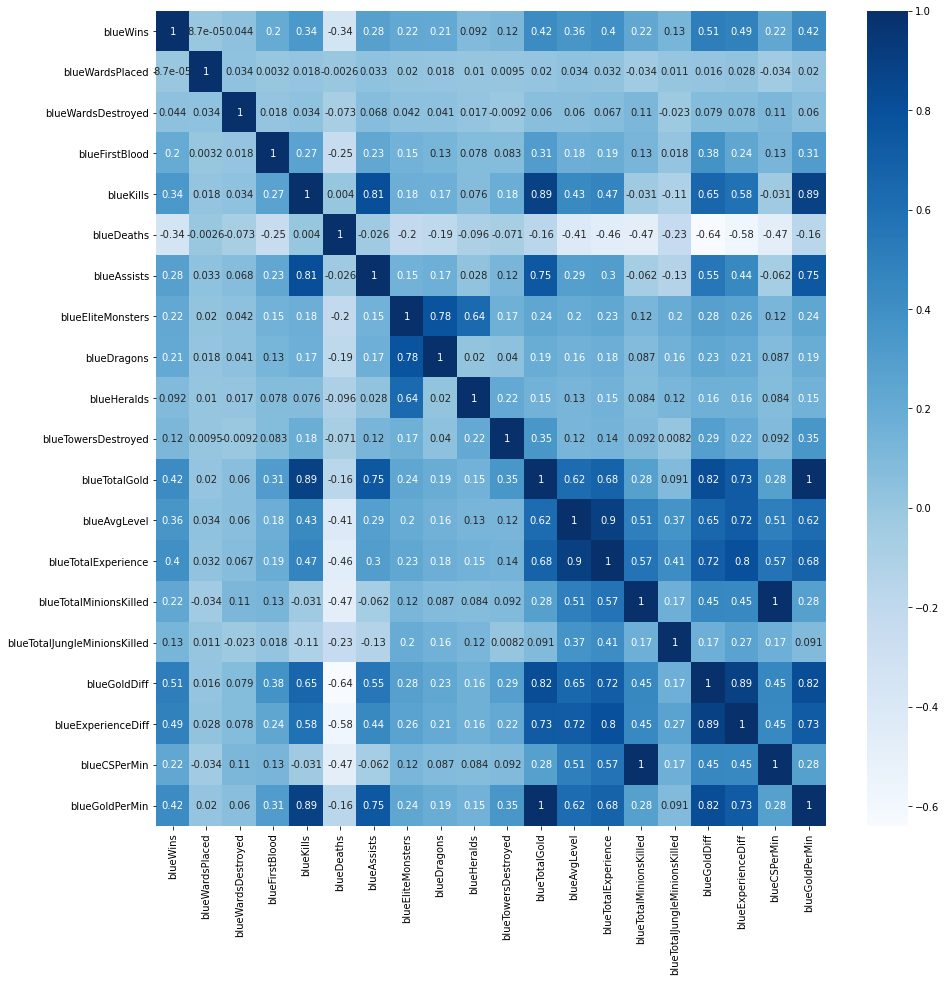

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(blue_df.corr(), annot=True, cmap='Blues')

CORRELATION MATRIX

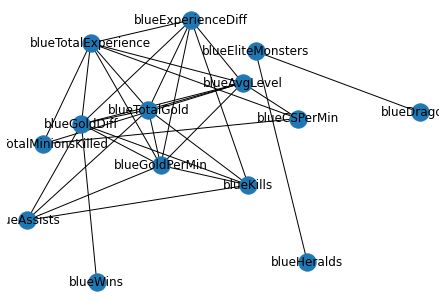

In [ ]:
import networkx as nx

blue_only_df = blue_df.corr()

links = blue_only_df.stack().reset_index()
links.columns = ['var1', 'var2', 'value']

links_filtered = links.loc[(links['value'] > 0.5) & (links['var1'] != links['var2'])]

G = nx.from_pandas_edgelist(links_filtered, 'var1', 'var2', edge_attr=True)
# G = pd.DataFrame(links_filtered, columns=['var1','var2'])
pos = nx.spring_layout(G, k=0.9, iterations=20)

nx.draw(G, pos=pos, with_labels=True)


This shows that the thing that makes teams win the most is gold difference with red

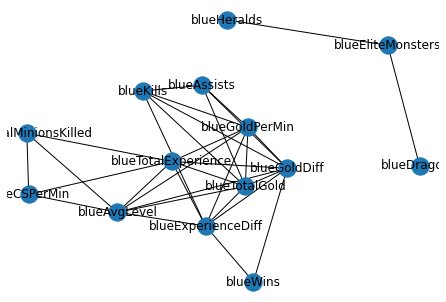

In [ ]:
blue_only_df = blue_df.corr()

links = blue_only_df.stack().reset_index()
links.columns = ['var1', 'var2', 'value']

links_filtered = links.loc[(links['value'] > 0.48) & (links['var1'] != links['var2'])]

G = nx.from_pandas_edgelist(links_filtered, 'var1', 'var2', edge_attr=True)
# G = pd.DataFrame(links_filtered, columns=['var1','var2'])
pos = nx.spring_layout(G, k=0.9, iterations=20)

nx.draw(G, pos=pos, with_labels=True)

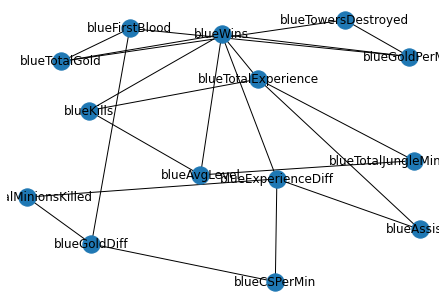

In [ ]:
blue_only_df = blue_df.corr()

links = blue_only_df.stack().reset_index()
links.columns = ['var1', 'var2', 'value']

links_filtered = links.loc[(links['value'] < 0.5) & (links['value'] > 0.3) & (links['var1'] != links['var2'])]

G = nx.from_pandas_edgelist(links_filtered, 'var1', 'var2', edge_attr=True)
# G = pd.DataFrame(links_filtered, columns=['var1','var2'])
pos = nx.spring_layout(G, k=0.9, iterations=20)

nx.draw(G, pos=pos, with_labels=True)

NOT SURE WHAT THIS MEANS PROBABLY DISREGARD THIS.

The following code was not written by our group and was given to us in CSCI4061: Data Science by Tyler Deutsch. After looking for the code online it can be referenced at [this link](https://datascience.stackexchange.com/questions/937/does-scikit-learn-have-forward-selection-stepwise-regression-algorithm)

In [ ]:
import statsmodels.api as sm
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:

            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        print(best_pval)
        if best_pval < threshold_in:
#            best_feature = new_pval.argmin()
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        
        worst_pval = pvalues.max() # null if pvalues is empty

        if worst_pval > threshold_out:
            
            changed=True
            worst_feature = pvalues.argmax()
            try:
              included.remove(worst_feature)
            except:
              continue
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


#result = stepwise_selection(X, y)

#print('resulting features:')
#print(result)
#imp_selection = df[result]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
names = []
names2 = []
accuracy = []
accuracy2 = []
err = []

In [ ]:
X = df.drop(['blueWins'],axis=1)
y = df['blueWins']
result_important = stepwise_selection(X, y) #this returns the important features using only training data
#print(result_important)
imp_selection_2 = df[result_important]
type(imp_selection_2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


0.0
Add  blueExperienceDiff             with p-value 0.0
0.0
Add  redExperienceDiff              with p-value 0.0
5.1185521602030345e-79
Add  blueGoldDiff                   with p-value 5.11855e-79
5.1185522877196226e-79
Add  redGoldDiff                    with p-value 5.11855e-79
2.6703862843107785e-29
Add  blueDragons                    with p-value 2.67039e-29
2.778972294177021e-06
Add  redDragons                     with p-value 2.77897e-06
0.0024757363881110525
Add  redTowersDestroyed             with p-value 0.00247574
0.0010662034286704266
Add  blueTowersDestroyed            with p-value 0.0010662
0.008219283234354795
Add  redTotalMinionsKilled          with p-value 0.00821928
0.008219283229474916
Add  redCSPerMin                    with p-value 0.00821928
0.04278978112111272


pandas.core.frame.DataFrame

In [ ]:
imp_selection_2.shape

(9879, 10)

In [ ]:
df.shape

(9879, 40)

In [ ]:
imp_selection_2.head()

,blueExperienceDiff,redExperienceDiff,blueGoldDiff,redGoldDiff,blueDragons,redDragons,redTowersDestroyed,blueTowersDestroyed,redTotalMinionsKilled,redCSPerMin
6432,1398,-1398,3324,-3324,1,0,0,0,227,22.7
6408,-1375,1375,-1590,1590,0,1,0,0,221,22.1
6402,259,-259,-866,866,0,1,0,0,249,24.9
3095,677,-677,1629,-1629,1,0,0,0,246,24.6
1035,-976,976,-1123,1123,0,1,0,0,232,23.2


In [ ]:
#important vars
X2 = imp_selection_2
y2 = df['blueWins']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.20)

In [ ]:
#all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Features that we are looking at

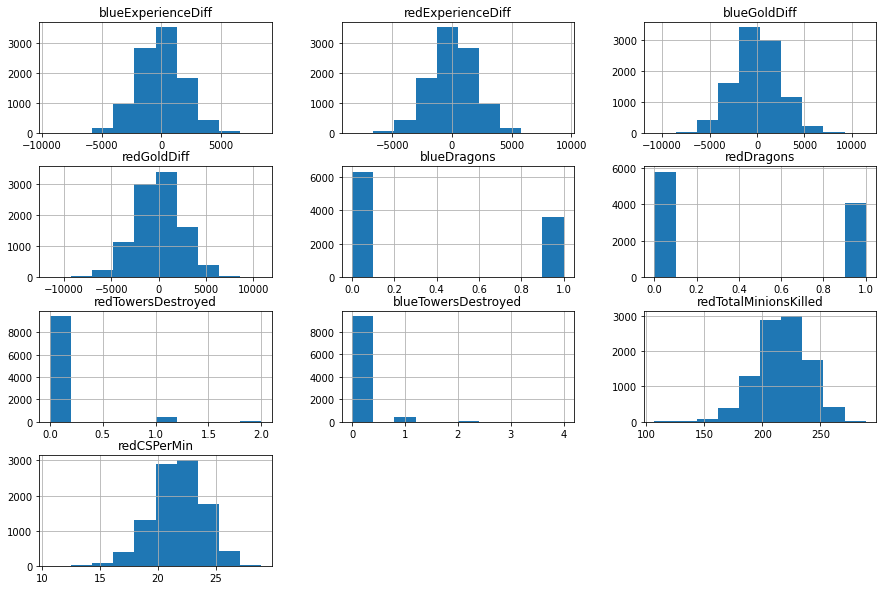

In [ ]:
X2.hist(figsize=[15,10])
plt.show()

In [ ]:
# Standardize data
# Info on how to perform on training and testing found here : https://datascience.stackexchange.com/questions/38395/standardscaler-before-and-after-splitting-data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scal = sc.fit_transform(X_train)
X_test_scal = sc.transform(X_test)
X_train_scal2 = sc.fit_transform(X2_train)
X_test_scal2 = sc.transform(X2_test)


Comparing how 'EliteMonster' (Baron Nashor, Rift Herald) kills affect the game 

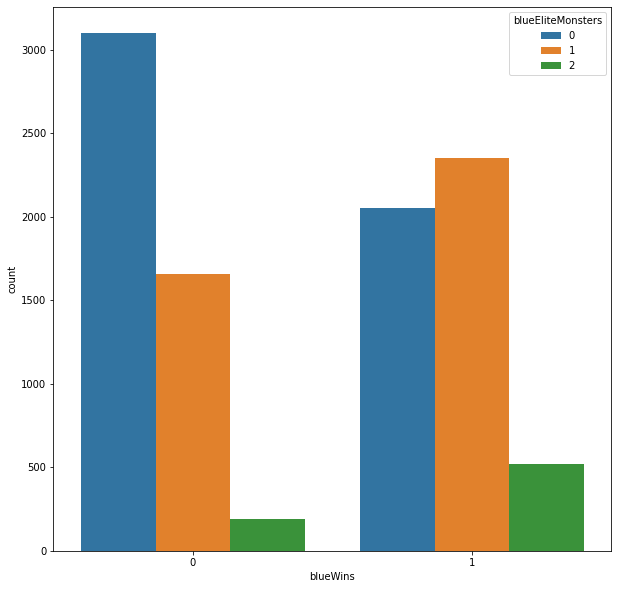

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x='blueWins', hue='blueEliteMonsters')
plt.show()

By interpreting this graph, if blue team wins, it is most likely because they killed at least one elite monster. If blue team loses it's most likely because they didn't kill elite monsters meaning they had less objective control over the whole game. 

This data shows that by killing more elite monsters, it gives a higher chance of winning to the team that does it.

Correlation Analyzing

In [ ]:
c_wins = np.corrcoef(df['blueWins'], df['blueGoldDiff'])[0][1]
print('correlation between blue wins and blue gold diff: ' + str(c_wins)) # 0.5 all max's

c_gdiff = np.corrcoef(df['blueGoldDiff'], df['blueExperienceDiff'])[0][1]
print('correlation between blueGoldDiff and blueExperienceDiff: ' + str(c_gdiff)) # 0.89

c_expdiff = np.corrcoef(df['blueExperienceDiff'], df['blueTotalExperience'])[0][1]
print('correlation between blueExperienceDiff and blueTotalExperience: ' + str(c_expdiff)) # 0.80
# ...

correlation between blue wins and blue gold diff: 0.5111190551762512
correlation between blueGoldDiff and blueExperienceDiff: 0.8947294549589985
correlation between blueExperienceDiff and blueTotalExperience: 0.800814586759065


We see that the highest correlation to winning a game is related to blueGoldDiff. Inorder to get a high gold difference, you need to have high experience difference from red. Inorder to have this, you need high total experience, and so on. Winning a game is not solely dependent on a few factors, but dependent on a large amount of factors. If all factors are satisfied, a win is more likely.

# Start models 

#Regression - Javier

For this section we will use regression to classify our data. Logistic as well as linear under multiple cases.

##Single linear Regression Model
For this model we will choose the feature ‘blueKills’ as from our intuition we assume that there is a direct correlation between how many enemies the blue team kills and whether they win so we would expect this to yield a better coefficient of determination over other features such as blueEliteMonsters.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import scipy.stats as sc
import statsmodels.api as sm
from statsmodels.formula.api import ols
X = df.drop('blueWins',axis=1) #drop target variable as were placing in seperate series
y = df['blueWins'] #place target varaible into seperate series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0) #use sklearn function to split data into train and test datasets - test size of .2

#we already have our y_train series containing our target variable
#what do we want our x to be for this single linear model?
#blueKills

x_var_single = np.array(X_train['blueKills'])
x_var_single = x_var_single.reshape(-1 ,1)
model = LinearRegression()
model.fit(x_var_single, y_train)
r_sq = model.score(x_var_single, y_train)
print('coefficient of determination:', r_sq)
print(len(y_train))
print(len(x_var_single))

coefficient of determination: 0.11675824351738406
7903
7903


score:0.11675824351738406
                            OLS Regression Results                            
Dep. Variable:               blueWins   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     1268.
Date:                Wed, 16 Dec 2020   Prob (F-statistic):          1.73e-261
Time:                        23:30:17   Log-Likelihood:                -6573.3
No. Observations:                9879   AIC:                         1.315e+04
Df Residuals:                    9877   BIC:                         1.316e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1526     

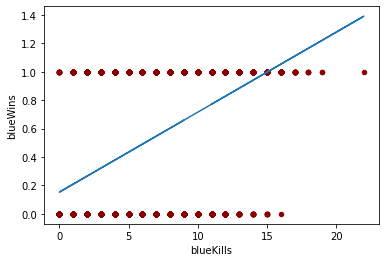

In [ ]:
df.plot.scatter(x='blueKills',
                      y='blueWins',
                      c='DarkRed')
print('score:' + str(model.score(x_var_single, y_train)))

blueKills = X_train['blueKills']
new_df = df[['blueKills', 'blueWins']]
model2 = ols("blueWins ~ blueKills", new_df).fit()
print(model2.summary())

mod_arr = np.polyfit(blueKills, y_train, 1)
print(mod_arr)
slope = mod_arr[0]
intercept = mod_arr[1]
plt.plot(blueKills, slope * blueKills + intercept)


Because our target variable is a binary (1 or 0) we wouldnt expect our line of best fit to fit the data well as we can see above. We can see that the relation between number of kills from blue team and wins is a linearly increasing though denoting that the more people blue kills the more likely they will win hence why the line is increasing to the 1 level. If our data was reversed and we had more less kills for blue in a win senario this line would be a linearly decreasing line. We can clearly see that there exists issues using linear regression for this dataset.

First of all this is a binary classification problem therefore were trying to predict wether or wether not something happend. We can see based off of our low R^2 value of .114 that the observed data points do not fit our regression line well. We also have our AIC and BIC indicaters of goodnes of fit where the higher the better and those values are virtually 0.

Overall linear regression does not fit well with this dataset as its generally used for predicting continoius variables rather than binary varaible.

We have much more than just one featues with predicitve power of who won so next lets try multiple linear regression and see if we can yield better results.

In [ ]:
X = X_train[['blueKills', 'blueDeaths', 'blueEliteMonsters', 'blueAssists']] 
#y = y_train


X = sm.add_constant(X)
est = sm.OLS(y_train, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               blueWins   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     613.9
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:30:17   Log-Likelihood:                -4666.1
No. Observations:                7903   AIC:                             9342.
Df Residuals:                    7898   BIC:                             9377.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4566      0.016     28.820      0.000       0.425       0.488
blueKills             0.0566      0.003     20.023      0.000       0.051       0.062
blueDeaths           -0.0540      0.002    -31.585      0.000      -0.057      -0.051
blueEliteMonsters     0.0746      0.008      9.178      0.000       0.059       0.091
blueAssists          -0.0023      0.002     -1.104      0.270      -0.006       0.002
==============================================================================
Omnibus:                     6296.455   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              466.956
Skew:                           0.004   Prob(JB):                    4.00e-102
Kurtosis:                       1.809   Cond. No.                         39.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see here that using 4 features rather than one we acheived a .24 R^2 value which is over 2x more than our other model yielded. This can be attributed to the fact that almost every feature in our dataset contributes to what would determine a win or loss for blue team so we will have much more predictve power when considering multiple features over one. This R^@ value still is quite low so we wouldnt consider this a good use of linear regression still on this dataset but it is a imporvment over what we previously obtained.

In [ ]:
import collections

x_var_single = np.array(X_train['blueKills'])
x_var_single = x_var_single.reshape(-1 ,1)
model = sm.Logit(y_train, x_var_single)
result = model.fit(method='newton')
result.predict()
result.summary()

Optimization terminated successfully.
         Current function value: 0.681437
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               blueWins   No. Observations:                 7903
Model:                          Logit   Df Residuals:                     7902
Method:                           MLE   Df Model:                            0
Date:                Wed, 16 Dec 2020   Pseudo R-squ.:                 0.01689
Time:                        23:30:17   Log-Likelihood:                -5385.4
converged:                       True   LL-Null:                       -5477.9
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0449      0.003     13.456      0.000       0.038       0.051
==============================================================================
"""

In [ ]:
from statsmodels.api import OLS
 
ols = OLS(y_train, X_train)
print(ols.fit().summary())

                            OLS Regression Results                            
Dep. Variable:               blueWins   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     116.6
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:30:17   Log-Likelihood:                -4449.3
No. Observations:                7903   AIC:                             8953.
Df Residuals:                    7876   BIC:                             9141.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
gameId          

###Logisitic regresion with scaling

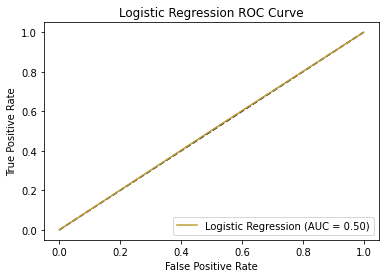

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_scal,y_train)
y_pred = lr.predict(X_test_scal)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
label='%s (AUC = %0.2f)' % ("Logistic Regression", roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=label, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
score = lr.score(X_test_scal, y_test)
print(score)
accuracy.append((score,"Logistic Regression Base Without Scaling"))
names.append(score)
#accuracy.append((score,"Logistic Regression Base With Scaling"))
#names.append(score)

0.5010121457489879


###Logisitic Regression without scaling

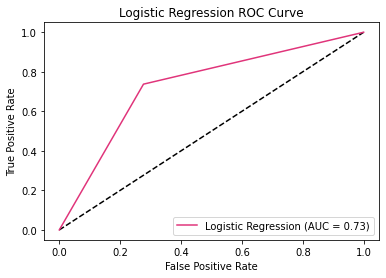

In [ ]:
X = df.drop('blueWins',axis=1) #drop target variable as were placing in seperate series
y = df['blueWins'] #place target varaible into seperate series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0) #use sklearn function to split data into train and test datasets - test size of .2

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
label='%s (AUC = %0.2f)' % ("Logistic Regression", roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=label, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
score = lr.score(X_test, y_test)
print(score)

0.7302631578947368


###Logistic Regression with feature selection

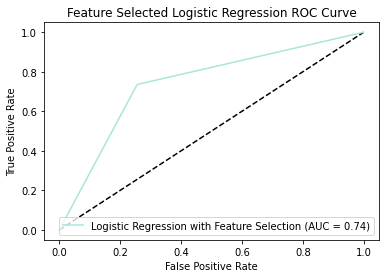

In [ ]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_scal2,y2_train)
y_pred = lr.predict(X_test_scal2)
fpr, tpr, thresholds = roc_curve(y2_test, y_pred)
roc_auc = auc(fpr, tpr)
label='%s (AUC = %0.2f)' % ("Logistic Regression with Feature Selection", roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=label, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Feature Selected Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#feature importance and scaling
score = lr.score(X_test_scal2, y2_test)
print(score)
accuracy2.append((score,"Logistic Regression Base With Scaling and Feature Selection"))
names2.append(score)

0.7398785425101214


In [ ]:
#feature importance without scaling
lr.fit(X2_train, y2_train)
score = lr.score(X2_test, y2_test)
print(score)

0.7338056680161943


Using Least Aquare logisitc regression here we find that we yield a R^2 value of .285 which is slightly better than with our previous linear regression using multiple features were the R^2 value was .24. As for logisitic and linear regression go this is going to be about as good as we can get without using an esnamble method to imporv our results and neither logistic or linear regression suits this classifcation task well. 

# Decision Tree Model - Javier Perez/Brandon

Decision tree grid search to find the right value for max depth.

In [ ]:
dt = DecisionTreeClassifier()

# search the best params
grid = {'max_depth': [5,10,20,40,60,80,100]},
# grid = {'max_depth': [2,4,6,8]},

grid_tree = GridSearchCV(dt, grid, cv=5)
grid_tree.fit(X_train_scal2, y2_train)

pred = grid_tree.predict(X_test_scal2)

# get the accuracy score
acc = accuracy_score(pred, y2_test)
print(acc)
grid_tree.best_params_

0.7241902834008097


{'max_depth': 5}

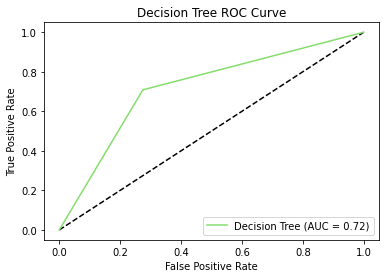

In [ ]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)
y_pred4 = dt.predict(X_test)
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred4)
roc_auc4 = auc(fpr4, tpr4)
label4='%s (AUC = %0.2f)' % ("Decision Tree", roc_auc4)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr4, tpr4, label=label4, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn import tree

print(tree.export_text(dt))


|--- feature_16 <= 189.50
|   |--- feature_16 <= -1671.50
|   |   |--- feature_16 <= -3261.50
|   |   |   |--- feature_11 <= 14810.50
|   |   |   |   |--- feature_25 <= 4.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_25 >  4.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_11 >  14810.50
|   |   |   |   |--- feature_32 <= 17881.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_32 >  17881.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_16 >  -3261.50
|   |   |   |--- feature_27 <= 0.50
|   |   |   |   |--- feature_21 <= 7.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_21 >  7.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_27 >  0.50
|   |   |   |   |--- feature_17 <= -1743.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_17 >  -1743.50
|   |   |   |   |   |--- class: 0
|   |--- feature_16 >  -1671.50
|   |   |--- feature_16 <= -686.50
|   |   |   |--- feature_8 <= 0.50
|   |   

In [ ]:
#all NOT SCALED
score = dt.score(X_test, y_test)
print(score)

0.7171052631578947


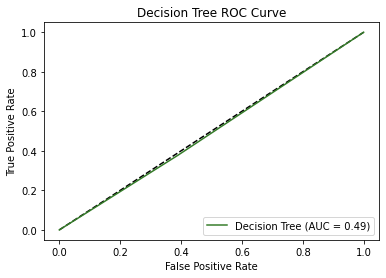

In [ ]:
dt.fit(X_train_scal,y_train)
y_pred2 = dt.predict(X_test_scal)
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred2)
roc_auc2 = auc(fpr2, tpr2)
label2='%s (AUC = %0.2f)' % ("Decision Tree", roc_auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr2, tpr2, label=label2, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#scaled all
score = dt.score(X_test_scal, y_test)
print(score)
accuracy.append((score,"Decision Tree Base"))
names.append(score)

0.4959514170040486


###Decision tree with Feature importance

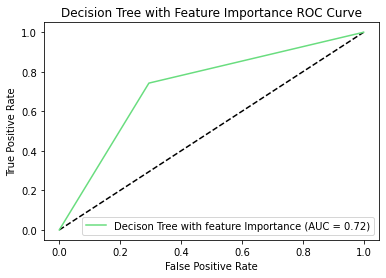

In [ ]:
dt.fit(X_train_scal2,y2_train)
y_pred4 = dt.predict(X_test_scal2)
fpr4, tpr4, thresholds = roc_curve(y2_test, y_pred4)
roc_auc4 = auc(fpr4, tpr4)
label4='%s (AUC = %0.2f)' % ("Decison Tree with feature Importance", roc_auc4)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr4, tpr4, label=label4, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree with Feature Importance ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#scaled and important
score = dt.score(X_test_scal2, y2_test)
print(score)
accuracy2.append((score,"Decison Tree Base With Scaling and Feature Selection"))
names2.append(score)

0.7241902834008097


In [ ]:
#NOT scaled but important
dt.fit(X2_train, y2_train)
score = dt.score(X2_test, y2_test)
print(score)

0.7236842105263158


In [ ]:
#WITHOUT GRID SEARCH
dt = DecisionTreeClassifier()
dt.fit(X_train_scal2,y2_train)
score = dt.score(X_test_scal2, y2_test)
print(score)

0.6442307692307693


##Decsion tree with only blueGoldDiff

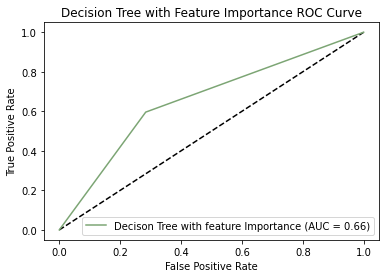

AUC: 0.6558704453441295


In [ ]:
from sklearn.metrics import accuracy_score
#using unscaled data
X3 = np.array(df['blueGoldDiff']).reshape(-1 , 1)
y3 = df['blueWins']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.20)


dt = DecisionTreeClassifier()

dt.fit(X3_train,y3_train)
y_pred4 = dt.predict(X3_test)
fpr4, tpr4, thresholds = roc_curve(y3_test, y_pred4)
roc_auc4 = auc(fpr4, tpr4)
label4='%s (AUC = %0.2f)' % ("Decison Tree with feature Importance", roc_auc4)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr4, tpr4, label=label4, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree with Feature Importance ROC Curve')
plt.legend(loc="lower right")
plt.show()
print("AUC: " + str(dt.score(X3_test, y3_test)))
# print("accuracy: " + str(accuracy_score(y_pred4, y2_test)))

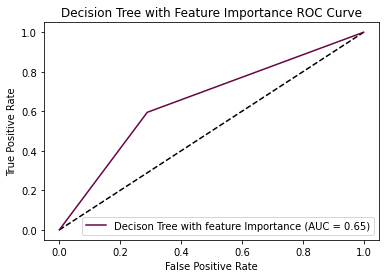

In [ ]:
#using scaled data

sc = StandardScaler()
X_train3_scal = sc.fit_transform(np.array(X3_train).reshape(-1 , 1))
X_test3_scal = sc.transform(X3_test)

dt = DecisionTreeClassifier()
dt.fit(X_train3_scal,y3_train)
y_pred4 = dt.predict(X_test3_scal)
fpr4, tpr4, thresholds = roc_curve(y3_test, y_pred4)
roc_auc4 = auc(fpr4, tpr4)
label4='%s (AUC = %0.2f)' % ("Decison Tree with feature Importance", roc_auc4)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr4, tpr4, label=label4, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree with Feature Importance ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#scaled and important
#score = dt.score(X_test_scal2, y2_test)
#print(score)

#SVM - Brandon

*We* just used a couple of linear and logiciregression models for our classifcation. Now well see how SVM eprforms. While SVM can work well with unstructeres and semi strutred data where as regression cant our data is structres and thus both models are not at a disadvantae due to that.

###SVC without scaling

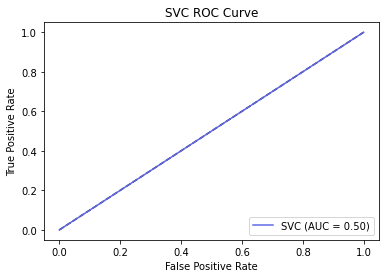

In [ ]:
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred4 = svc.predict(X_test)
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred4)
roc_auc4 = auc(fpr4, tpr4)
label4='%s (AUC = %0.2f)' % ("SVC", roc_auc4)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr4, tpr4, label=label4, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
score_svc = svc.score(X_test, y_test)
print(score_svc)
#accuracy.append((score_svc,"SVC Base No Scaling"))
#names.append(score_svc)

0.49139676113360325


###SVC with scaling

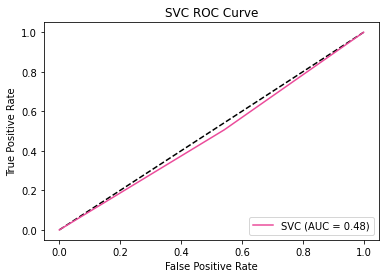

In [ ]:
svc = SVC(kernel='rbf')
svc.fit(X_train_scal,y_train)
y_pred4 = svc.predict(X_test_scal)
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred4)
roc_auc4 = auc(fpr4, tpr4)
label4='%s (AUC = %0.2f)' % ("SVC", roc_auc4)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr4, tpr4, label=label4, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
score_svc = svc.score(X_test_scal, y_test)
print(score_svc)
accuracy.append((score_svc,"SVC Base With Scaling"))
names.append(score_svc)

0.4817813765182186


Above we have our ROC curve of our data (more area under curve is better). Unlike with regression we dont have R^2, AIC or BIC to evaluate perfornace. For SVM we will use the accuracy , recall and precision.

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred4)

array([[460, 545],
       [479, 492]])

SVC with feature importance

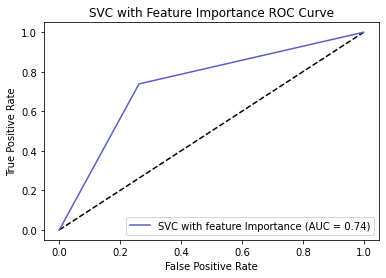

In [ ]:
svc = SVC(kernel='rbf')
svc.fit(X_train_scal2,y2_train)
y_pred4 = svc.predict(X_test_scal2)
fpr4, tpr4, thresholds = roc_curve(y2_test, y_pred4)
roc_auc4 = auc(fpr4, tpr4)
label4='%s (AUC = %0.2f)' % ("SVC with feature Importance", roc_auc4)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr4, tpr4, label=label4, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC with Feature Importance ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
confusion_matrix(y2_test,y_pred4)

array([[727, 258],
       [259, 732]])

In [ ]:
score = svc.score(X_test_scal2, y2_test)
print(score)
accuracy2.append((score,"SVC Base With Scaling and Feature Selection"))
names2.append(score)

0.7383603238866396


In [ ]:
#NOT scaled but important
svc.fit(X2_train, y2_train)
score = svc.score(X2_test, y2_test)
print(score)

0.7348178137651822


#Random Forest - Thomas

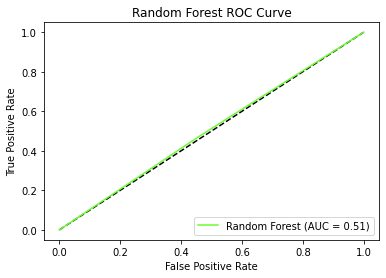

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scal,y_train)
y_pred2 = rf.predict(X_test_scal)
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred2)
roc_auc2 = auc(fpr2, tpr2)
label2='%s (AUC = %0.2f)' % ("Random Forest", roc_auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr2, tpr2, label=label2, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
score = rf.score(X_test_scal, y_test)
print(score)
print(accuracy_score(y_pred2,y_test))
accuracy.append((score,"Random Forest"))
names.append(score)


0.5075910931174089
0.5075910931174089


In [ ]:
#no scaled ALL FEAUTERES
rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)
print(score)

0.7378542510121457


In [ ]:
confusion_matrix(y_test,y_pred2)

array([[550, 455],
       [518, 453]])

##### Random Forest with Feature Importance 

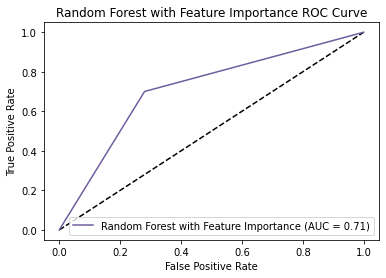

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scal2,y2_train)
y_pred2 = rf.predict(X_test_scal2)
fpr2, tpr2, thresholds = roc_curve(y2_test, y_pred2)
roc_auc2 = auc(fpr2, tpr2)
label2='%s (AUC = %0.2f)' % ("Random Forest with Feature Importance", roc_auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr2, tpr2, label=label2, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest with Feature Importance ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#important scaled
score = rf.score(X_test_scal2, y2_test)
print(score)
accuracy2.append((score,"Random Forest with Feature Importance"))
names2.append(score)

0.7100202429149798


In [ ]:
#NOT scaled but important
rf.fit(X2_train, y2_train)
score = rf.score(X2_test, y2_test)
print(score)

0.7155870445344129


In [ ]:
confusion_matrix(y2_test,y_pred2)


array([[709, 276],
       [297, 694]])

#KNN - Kripa

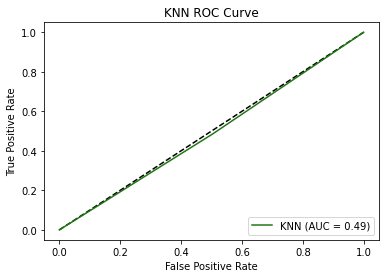

In [ ]:
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(X_train_scal,y_train)
y_pred3 = kn.predict(X_test_scal)
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred3)
roc_auc3 = auc(fpr3, tpr3)
label3='%s (AUC = %0.2f)' % ("KNN", roc_auc3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr3, tpr3, label=label3, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.show()

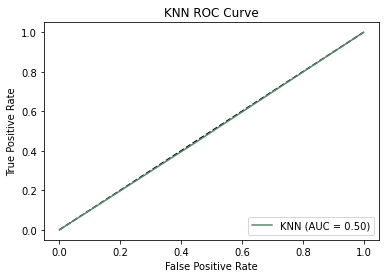

In [ ]:
kn2 = KNeighborsClassifier(n_neighbors=20)
kn2.fit(X_train_scal,y_train)
y_pred3 = kn2.predict(X_test_scal)
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred3)
roc_auc3 = auc(fpr3, tpr3)
label3='%s (AUC = %0.2f)' % ("KNN", roc_auc3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr3, tpr3, label=label3, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.show()

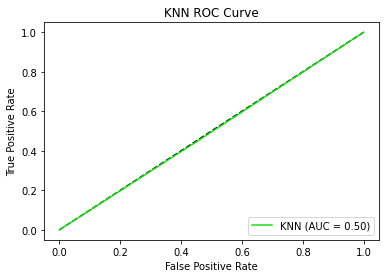

In [ ]:
kn3 = KNeighborsClassifier(n_neighbors=50)
kn3.fit(X_train_scal,y_train)
y_pred3 = kn3.predict(X_test_scal)
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred3)
roc_auc3 = auc(fpr3, tpr3)
label3='%s (AUC = %0.2f)' % ("KNN", roc_auc3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr3, tpr3, label=label3, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'n_neighbors': range(1,20)}

tree_grid = GridSearchCV(kn, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    9.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=1, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(1, 20)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=True)

In [ ]:
tree_grid.best_params_

{'n_neighbors': 1}

In [ ]:
# with grid search cv
tree_grid.best_score_ 

0.5534643992345816

In [ ]:
score = kn.score(X_test_scal, y_test)
print(score)
accuracy.append((score,"KNN Base"))
names.append(score)

0.4908906882591093


In [ ]:
confusion_matrix(y_test,y_pred3)

array([[524, 481],
       [511, 460]])

#### KNN with Feature Importance

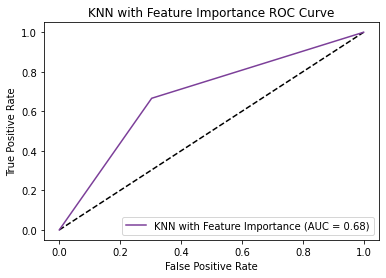

In [ ]:
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(X_train_scal2,y2_train)
y_pred3 = kn.predict(X_test_scal2)
fpr3, tpr3, thresholds = roc_curve(y2_test, y_pred3)
roc_auc3 = auc(fpr3, tpr3)
label3='%s (AUC = %0.2f)' % ("KNN with Feature Importance", roc_auc3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr3, tpr3, label=label3, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN with Feature Importance ROC Curve')
plt.legend(loc="lower right")
plt.show()

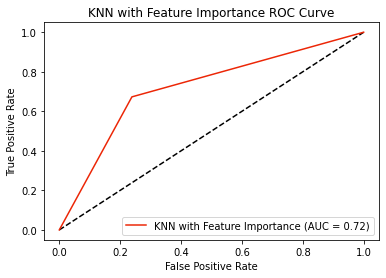

In [ ]:
kn = KNeighborsClassifier(n_neighbors=20)
kn.fit(X_train_scal2,y2_train)
y_pred3 = kn.predict(X_test_scal2)
fpr3, tpr3, thresholds = roc_curve(y2_test, y_pred3)
roc_auc3 = auc(fpr3, tpr3)
label3='%s (AUC = %0.2f)' % ("KNN with Feature Importance", roc_auc3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr3, tpr3, label=label3, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN with Feature Importance ROC Curve')
plt.legend(loc="lower right")
plt.show()

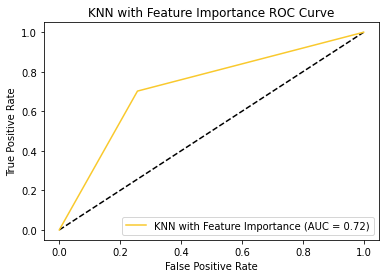

In [ ]:
kn = KNeighborsClassifier(n_neighbors=50)
kn.fit(X_train_scal2,y2_train)
y_pred3 = kn.predict(X_test_scal2)
fpr3, tpr3, thresholds = roc_curve(y2_test, y_pred3)
roc_auc3 = auc(fpr3, tpr3)
label3='%s (AUC = %0.2f)' % ("KNN with Feature Importance", roc_auc3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr3, tpr3, label=label3, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN with Feature Importance ROC Curve')
plt.legend(loc="lower right")
plt.show()

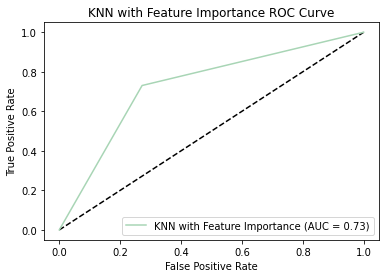

In [ ]:
kn = KNeighborsClassifier(n_neighbors=100)
kn.fit(X_train_scal2,y2_train)
y_pred3 = kn.predict(X_test_scal2)
fpr3, tpr3, thresholds = roc_curve(y2_test, y_pred3)
roc_auc3 = auc(fpr3, tpr3)
label3='%s (AUC = %0.2f)' % ("KNN with Feature Importance", roc_auc3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr3, tpr3, label=label3, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN with Feature Importance ROC Curve')
plt.legend(loc="lower right")
plt.show()

##### KNN with Feature Importance Accuracy and Confusion Matrix

In [ ]:
score = kn.score(X_test_scal2, y2_test)
print(score)
accuracy2.append((score,"KNN with feature importance"))
names2.append(score)

0.729251012145749


In [ ]:
# scaled with grid search did not yield best results?
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'n_neighbors': range(1,20)}

tree_grid = GridSearchCV(kn, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train_scal2,y2_train)



Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:   13.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=100, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(1, 20)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=True)

In [ ]:
tree_grid.best_params_

{'n_neighbors': 19}

In [ ]:
tree_grid.best_score_

0.7197257784289706

In [ ]:
#NOT scaled but important
kn.fit(X2_train, y2_train)
score = kn.score(X2_test, y2_test)
print(score)

0.729757085020243


In [ ]:
confusion_matrix(y2_test,y_pred3)

array([[717, 268],
       [267, 724]])

#Stacking - Brandon

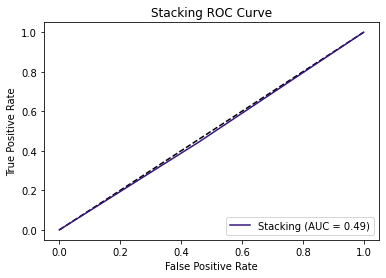

In [ ]:
lr_clf = LogisticRegression(C=30000, penalty='l2',  multi_class='multinomial',solver='newton-cg')
sclf = StackingClassifier(classifiers=[lr, rf,kn, svc,], meta_classifier=lr_clf)
sclf.fit(X_train_scal,y_train)
y_pred5 = sclf.predict(X_test_scal)
fpr5, tpr5, thresholds = roc_curve(y_test, y_pred5)
roc_auc5 = auc(fpr5, tpr5)
label5='%s (AUC = %0.2f)' % ("Stacking", roc_auc5)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr5, tpr5, label=label5, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stacking ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
score = sclf.score(X_test_scal, y_test)
print(score)
accuracy.append((score,"Stacking Base"))
names.append(score)

0.4939271255060729


In [ ]:
confusion_matrix(y_test,y_pred5)

array([[546, 459],
       [541, 430]])

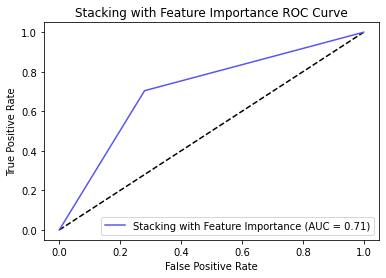

In [ ]:
lr_clf = LogisticRegression(C=30000, penalty='l2',  multi_class='multinomial',solver='newton-cg')
sclf = StackingClassifier(classifiers=[lr, rf,kn, svc,], meta_classifier=lr_clf)
sclf.fit(X_train_scal2,y2_train)
y_pred5 = sclf.predict(X_test_scal2)
fpr5, tpr5, thresholds = roc_curve(y2_test, y_pred5)
roc_auc5 = auc(fpr5, tpr5)
label5='%s (AUC = %0.2f)' % ("Stacking with Feature Importance", roc_auc5)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr5, tpr5, label=label5, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stacking with Feature Importance ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
score = sclf.score(X_test_scal2, y2_test)
print(score)
accuracy2.append((score,"Stacking and Feature Selection"))
names2.append(score)

0.7120445344129555


In [ ]:
confusion_matrix(y2_test,y_pred5)

array([[709, 276],
       [293, 698]])

#Naive Bayes - Kripa

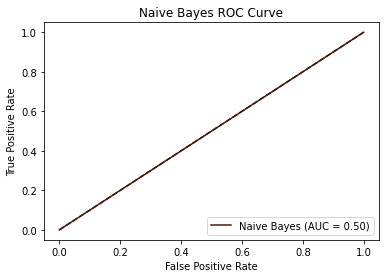

In [ ]:
gu = GaussianNB()
gu.fit(X_train_scal,y_train)
y_pred3 = gu.predict(X_test_scal)
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred3)
roc_auc3 = auc(fpr3, tpr3)
label3='%s (AUC = %0.2f)' % ("Naive Bayes", roc_auc3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr3, tpr3, label=label3, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
score = gu.score(X_test_scal, y_test)
print(score)
accuracy.append((score,"naive Bayes Base"))
names.append(score)

0.4974696356275304


###Naive Bayes with Feature Importance

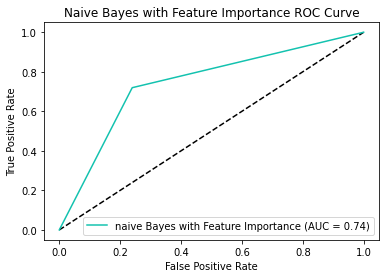

In [ ]:
gu = GaussianNB()
gu.fit(X_train_scal2,y2_train)
y_pred3 = gu.predict(X_test_scal2)
fpr3, tpr3, thresholds = roc_curve(y2_test, y_pred3)
roc_auc3 = auc(fpr3, tpr3)
label3='%s (AUC = %0.2f)' % ("naive Bayes with Feature Importance", roc_auc3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr3, tpr3, label=label3, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes with Feature Importance ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
score = gu.score(X_test_scal2, y2_test)
print(score)
accuracy2.append((score,"naive Bayes Feature Selection"))
names2.append(score)

0.7398785425101214


#Perceptron - Kobin

In [ ]:
from sklearn.linear_model import Perceptron


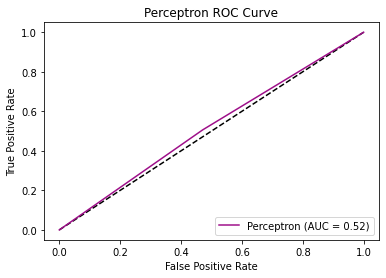

In [ ]:
pe = Perceptron(tol=1e-3, random_state=0)
pe.fit(X_train_scal,y_train)
y_pred3 =pe.predict(X_test_scal)
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred3)
roc_auc3 = auc(fpr3, tpr3)
label3='%s (AUC = %0.2f)' % ("Perceptron", roc_auc3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr3, tpr3, label=label3, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Perceptron ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
score = pe.score(X_test_scal, y_test)
print(score)
accuracy.append((score,"Perceptron Base"))
names.append(score)

0.5177125506072875


##Perceptron with Feature Importance

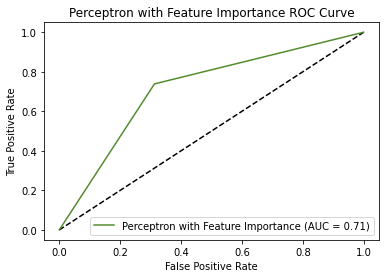

In [ ]:
pe = Perceptron(tol=1e-3, random_state=0)
pe.fit(X_train_scal2,y2_train)
y_pred3 = pe.predict(X_test_scal2)
fpr3, tpr3, thresholds = roc_curve(y2_test, y_pred3)
roc_auc3 = auc(fpr3, tpr3)
label3='%s (AUC = %0.2f)' % ("Perceptron with Feature Importance", roc_auc3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr3, tpr3, label=label3, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Perceptron with Feature Importance ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
score = pe.score(X_test_scal2, y2_test)
print(score)
accuracy2.append((score,"Perceptron Feature Selection"))
names2.append(score)

0.7130566801619433


#Summary of Classifiers

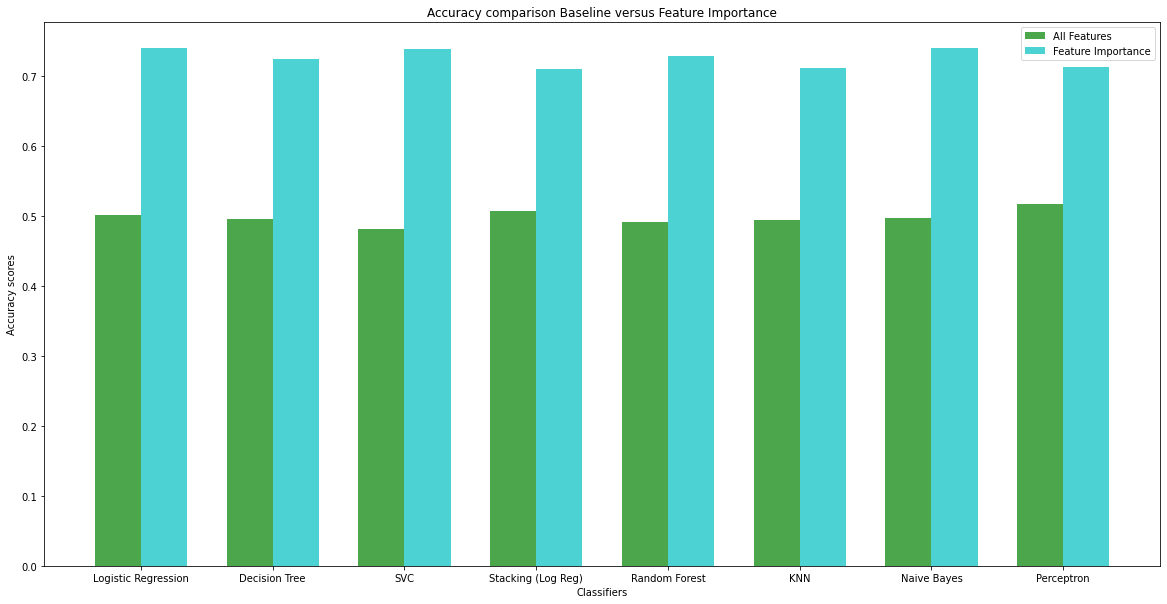

In [ ]:
labels = ['Logistic Regression','Decision Tree', 'SVC', 'Stacking (Log Reg)', 'Random Forest','KNN', 'Naive Bayes', 'Perceptron']
from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots(figsize=(20,10))
n_groups = 8################################################## THIS MUST CHANGE TO MATCH NUMBER TO APPENDED ARRAY 
                                                             # If you add a model and append that score to a list increase this number by 1

index = np.arange(n_groups)

bar_width = 0.35
opacity = .7
error_config = {'ecolor': '0.3'}
normal_clf = ax.bar(index, names, bar_width, alpha=opacity, color='g', label='All Features')
bagging_clf = ax.bar(index + bar_width, names2, bar_width, alpha=opacity, color='c', label='Feature Importance')
ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy scores')
ax.set_title('Accuracy comparison Baseline versus Feature Importance')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels((labels))
ax.legend()
#fig.tight_layout()
plt.show()

#Why is feature importance so much better

Find out why for logistic regression and decision tree feature importance isn't that much better

# Conclusion 

If we had more data, we could predict the game real time
